
# Project: Investigate a Dataset - [Medical Appointment No Shows]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. 
  
1- PatientId: indicates the id that identifies each patient.

2- AppointmentID: indicates the id that identifies each appointment.

3- Gender indicates: the patient's gender (Female 'F' or Male 'M').

4- ScheduledDay: tells us on what day the patient set up their appointment.

5- AppointmentDay: when will the appointment take place.

6- Age: tells how old is the patient.

7- Neighborhood: indicates the location of the hospital.

8- Scholarship: indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

9- Hipertension: the patient has hipertension or not.

10- Diabetes the: patient is with diabetes or not.

11- Alcoholism: the patient consumes alcohol or not.

12- Handcap: the patient is handicapped or not and the number of disabillities the have.

13- SMS_received: the patient received a SMS or not.

14- No-show: Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


### Question(s) for Analysis

>Research Question 1 (Are there a lot of people no-show?)

>Research Question 2 (The effect of waiting days in no-show?)

>Research Question 3 ( Does Age affect the attendance?)

>Research Question 4 ( Does Gender affect the No-show ratio?)

>Research Question 6 (What is The effect of Diabetes in no-show?)

>Research Question 7 (What is The effect of Alcoholism in no-show?)

>Research Question 8 (What is The effect of Handicap in no-show?)

>Research Question 9 (Is SMS Has A Remarkable Contribution In Attendance?)

In [1]:
# Use this cell to set up import statements for all of the packages that you
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/noshowappointments/KaggleV2-May-2016.csv


<a id='wrangling'></a>
# Data Wrangling


In [2]:
# Load your data and print out a few lines. Perform operations to inspect data

df = pd.read_csv("/kaggle/input/noshowappointments/KaggleV2-May-2016.csv")
print(df.shape)
df.head()

(110527, 14)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



# Data Cleaning

## We have to show data info to know what we need to correct in data

In [3]:
print(df.info())  ## print data info
print("The number of Null Values : " + str(df.isnull().sum().sum())) ### number of Null Values
print("The number of duplicated Values : " + str(df.duplicated().sum())) ### number of duplicated Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
None
The number of Null Values : 0
The number of duplicated Values : 0


#### From the data info we find that we don't have any null values in our dataset
#### And we have no any duplicated Rows in our data

## From the Data info we found that we need 
#### 1- Data Type of ScheduledDay and AppointmentDay will be changed to DateTime.
#### 2- As the AppointmentDay has 00:00:00 in it's TimeStamp, we will ignore it.
#### 3- we dont need (PatientId, AppointmentID) so we will drop them
#### 4- Add a new column -  Waiting days -  to help us in our analsys
#### 5- Columns names should be correct to analsys the data easy 
#### 6- Make no-show column (0,1) insted of (yes,no) to be easy to work with

### have to check the duplicated and delete them

### We have two Coulmns for Dates (ScheduledDay,  AppointmentDay) but as shown They are in wrong format we have to change them to date formate

In [4]:
# correct ScheduledDay, AppointmentDay datatype from string to right timedata
df['ScheduledDay'] = pd.to_datetime(df["ScheduledDay"]).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df["AppointmentDay"]).dt.date.astype('datetime64[ns]')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### we changed it correctly to DateTime form

### In our analsys we don't need the coulmns (PatientId, AppointmentID) They we will not effect so i will delete them

In [5]:
## we will asign the DateFram in another variable to dont lose them in the original data set.
df2 = df.drop(['PatientId', 'AppointmentID'], axis=1)
df2.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### We can add coulmn ( Waiting day ) to help us in our analysis 
Waiting day = ScheduledDay - AppointmentDay

In [6]:
###
# Add new column Waiting day 
# Waiting day = ScheduledDay - AppointmentDay
###
calcp = (df["AppointmentDay"] - df["ScheduledDay"] ).dt.days.astype(int)
df2.insert(loc = 3,column = 'WaitDays', value = calcp)

#### we added the new column right now we will replace the columns names

In [7]:
#rename columns to the right names
df2.rename(columns={'WaitDays':'Wait_Days','Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'AppointmentDay':'Appointment_Day', 'ScheduledDay':'Scheduled_Day' },\
          inplace=True)
df2.head()

,Gender,Scheduled_Day,Appointment_Day,Wait_Days,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,0,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,0,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,0,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,0,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,0,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Now we check if all ages is logic or no ?

In [8]:
df[df["Age"]<0] #find if there is a record with not logical age (<0)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


##### We found one record with -1 age which is not logical

In [9]:
df2 = df2[df2["Age"]>0] # neglect the unlogical ages

### Now we have to repace (Yes , No) values in the no-show column to (0,1) to be easy in work with

In [10]:
## rplace values in No-show column to be easy 
# Yes ----> 1
# No -----> 0

df2["No-show"].replace({'Yes': 1, 'No': 0}, inplace = True) 

In [11]:
df2.head(2)

,Gender,Scheduled_Day,Appointment_Day,Wait_Days,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,0,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29,2016-04-29,0,56,JARDIM DA PENHA,0,0,0,0,0,0,0


In [12]:
df2.drop_duplicates(inplace=True) ## clear duplicated
df2.duplicated().sum()

0

### Functions to help in plots

In [13]:
def my_pie(data,label,title,figsizepie=(5,5)):
    ''' 
        Function to don't repeat pie plot and make it easy
        data          ------> the data to plot                - data fram -
        label         ------> the labels shown in pie chart   - list - 
        title         ------> the Title Of the pie cahrt      - string - 
        figsizepie    ------> the figer size with defult 5*5  - tuble -
    '''
    data.plot(kind="pie",labels=label,figsize=figsizepie,autopct='%1.1f%%');
    plt.title('The ration between Show or no-show When the waitinig days less than 1 week')

<a id='eda'></a>
## Exploratory Data Analysis



#### let's do some quick visuls to help us undrstand the data more

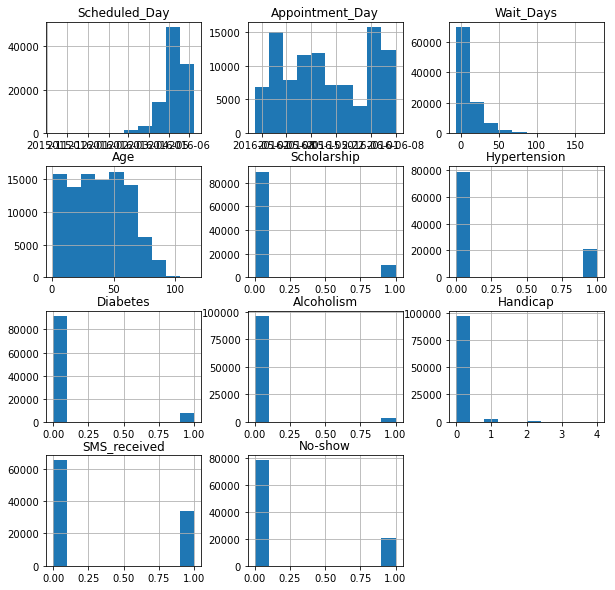

In [14]:
# drow Histogram for each coulmn
df2.hist(figsize=(10,10));

In [15]:
#drow heat map to see the correlations bettwen the columns well
df2.corr().style.background_gradient()

,Wait_Days,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
Wait_Days,1.000000,0.027323,-0.034219,-0.025744,-0.033200,-0.034274,-0.021578,0.387558,0.176915
Age,0.027323,1.000000,-0.119420,0.506115,0.292616,0.084500,0.074833,-0.005244,-0.073930
Scholarship,-0.034219,-0.119420,1.000000,-0.031019,-0.030054,0.032027,-0.010816,-0.003278,0.025481
Hypertension,-0.025744,0.506115,-0.031019,1.000000,0.429826,0.082309,0.079020,-0.018746,-0.044859
Diabetes,-0.033200,0.292616,-0.030054,0.429826,1.000000,0.019444,0.057475,-0.022948,-0.019672
Alcoholism,-0.034274,0.084500,0.032027,0.082309,0.019444,1.000000,0.003391,-0.021607,0.004489
Handicap,-0.021578,0.074833,-0.010816,0.079020,0.057475,0.003391,1.000000,-0.026863,-0.010899
SMS_received,0.387558,-0.005244,-0.003278,-0.018746,-0.022948,-0.021607,-0.026863,1.000000,0.120477
No-show,0.176915,-0.073930,0.025481,-0.044859,-0.019672,0.004489,-0.010899,0.120477,1.000000


##### As we see from the Heatmap There is not alot of corelations bettwen columns with No-show  as shown 


## Research Question 1 (Are there a lot of people no-show)
#### In no-show column we have only two values (yes, no)

In [16]:
df2['No-show'].value_counts() ## this code to see the number of yes and no in the no-show column

0    78560
1    20921
Name: No-show, dtype: int64

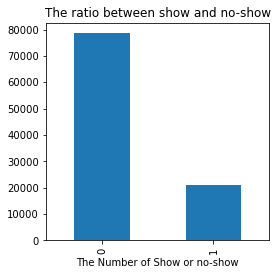

In [17]:
my_plot = df2['No-show'].value_counts().plot(kind='bar',title="Number of No-show",figsize=(4, 4))
plt.xlabel("The Number of Show or no-show")
plt.title("The ratio between show and no-show")
plt.show()

##### As we see the number of  NO = 88208, And the number of Yes =  22319
##### The plot show us that every 5 appointment there is 1 no-show so that is not okay

### Research Question 2  (The effect of waiting days in no-show)

In [18]:
df2['Wait_Days'].value_counts().count()

131

##### AS we see we have a lot different values in Waiting Days so to plot them we should to divide them less than week its okey more than week its alot


In [19]:
less_than_week = df2[df2['Wait_Days'] < 8]
print(less_than_week.shape)

(62241, 13)


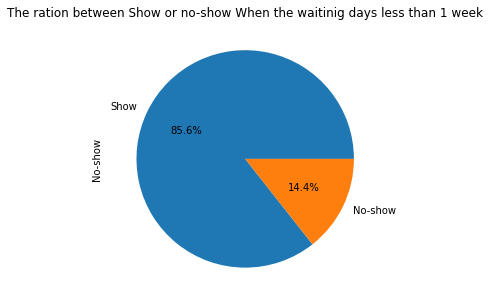

In [20]:
data = less_than_week['No-show'].value_counts()
title = 'The ration between Show or no-show When the waitinig days less than 1 week'
my_pie(data,['Show','No-show'], title)


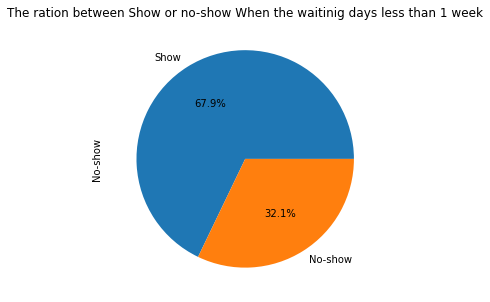

In [21]:
### use my_pie function
less_than_week = df2[df2['Wait_Days'] >= 8]
data = less_than_week['No-show'].value_counts()
title = 'The ration between Show or no-show When the waitinig days More than 1 week'
my_pie(data,['Show','No-show'], title)

#### as we see when the waiting days is 1 week or less we have no-show  (13.5%) but when the waiting days more than 1 wekk the no-show is 32%
#### So it is clear that the greater the number of waiting days, the greater the number of No-Show

### Research Question 3 ( Does Age affect the attendance?)

#### To analyis the relation between the age and the no-show we have to calssificate the ages to 4 groups (children, youth,adults ,seniors)

In [22]:
infants = df2.query('Age < 3')
child = df2[(df2['Age'] < 18) & (df2['Age'] > 3)]
youth = df2[(df2['Age'] < 30) & (df2['Age'] > 18)]
adults = df2[(df2['Age'] < 60) & (df2['Age'] > 30)]
seniors = df2[df2['Age'] >60]
print(child['No-show'].mean())
print(youth['No-show'].mean())
print(adults['No-show'].mean())
print(seniors['No-show'].mean())


0.24560681751395827
0.25932717398970306
0.20488740289113974
0.1544823198854901


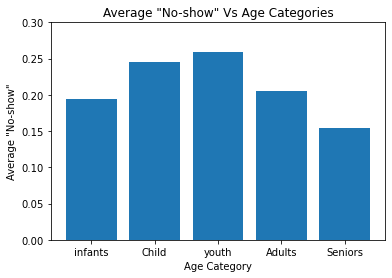

In [23]:
values = [infants['No-show'].mean(), child['No-show'].mean(),youth['No-show'].mean(), adults['No-show'].mean(), seniors['No-show'].mean()]
x = [1,2,3,4,5]
labels = ['infants' ,'Child','youth','Adults','Seniors']

plt.bar(x, values, tick_label = labels)
plt.title('Average "No-show" Vs Age Categories')
plt.ylim([0,0.3]) #to focus on this spot to feel the change
plt.xlabel('Age Category')
plt.ylabel('Average "No-show"')
plt.show()

#### As shown older patients are more committed to their appointments' scheduled than younger ones.
#### And youths have most no-show average

## Research Question 4 ( Does Gender affect the No-show ratio?)

In [24]:
df2.groupby(['Gender'])['No-show'].mean()

Gender
F    0.211402
M    0.208174
Name: No-show, dtype: float64

Text(0, 0.5, 'count of patients')

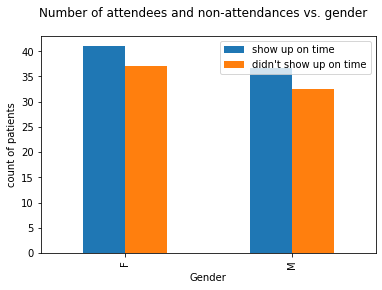

In [25]:
x = df2.groupby(['Gender','No-show']).mean()
x["Age"].unstack().plot(kind='bar')
plt.legend(["show up on time","didn't show up on time"]) #Clarify the features of the drawing
plt.suptitle('Number of attendees and non-attendances vs. gender') #a title to paint it
plt.ylabel('count of patients') #Add an address to the y axis

### We note that the attendance rate between the Males and Females is very similar, So it don't effect


### Research Question 4 ( Does Neighbourhood affect the No-show ratio?)

In [26]:
df2[['Neighbourhood']].describe(include="all") # small things to know about Neighbourhood

,Neighbourhood
count,99481
unique,81
top,JARDIM CAMBURI
freq,6521


##### As we see in the describe table "JARDIM CAMBURI" is has the most Reservation time

<AxesSubplot:xlabel='Neighbourhood'>

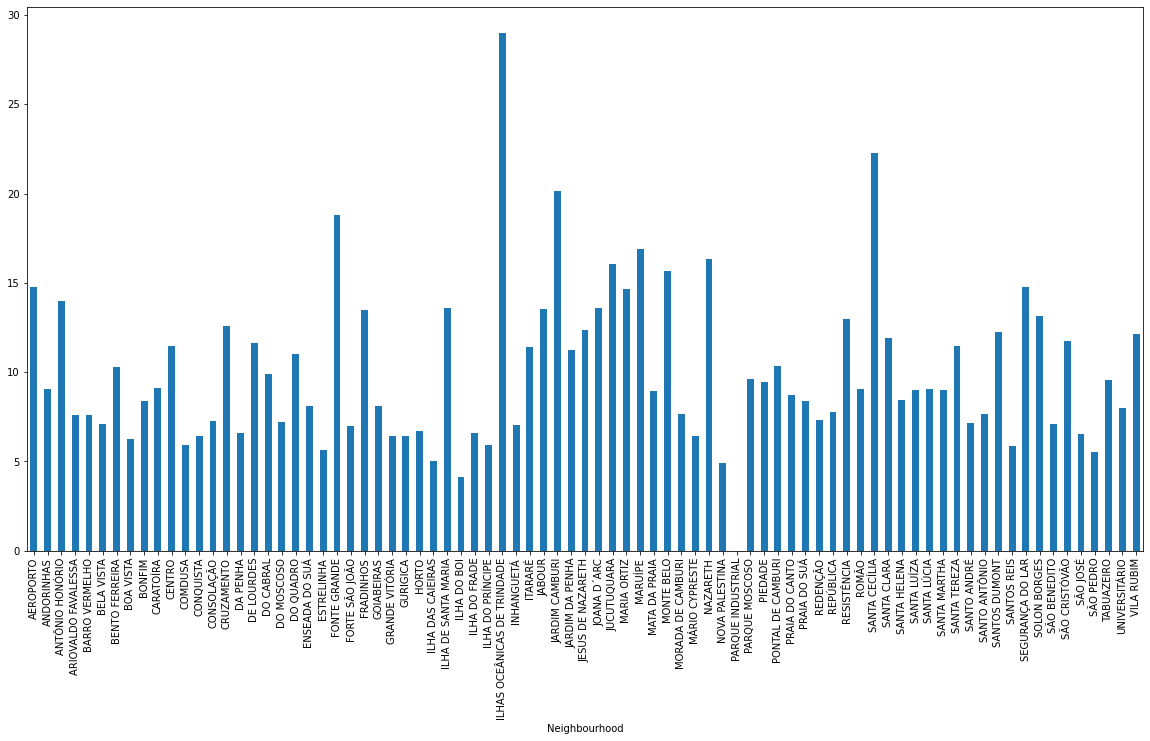

In [27]:

df2.groupby(['Neighbourhood'])['Wait_Days'].mean().plot(kind='bar',figsize=(20,10),fontsize=10)

##### And "ILHAS OCEÂNICAS DE TRINDADE" has the biggest waiting time you have to wait 28 in average 

In [28]:
df2[df2['Neighbourhood'] == 'ILHAS OCEÂNICAS DE TRINDADE'].shape[0]

2

<AxesSubplot:xlabel='Neighbourhood'>

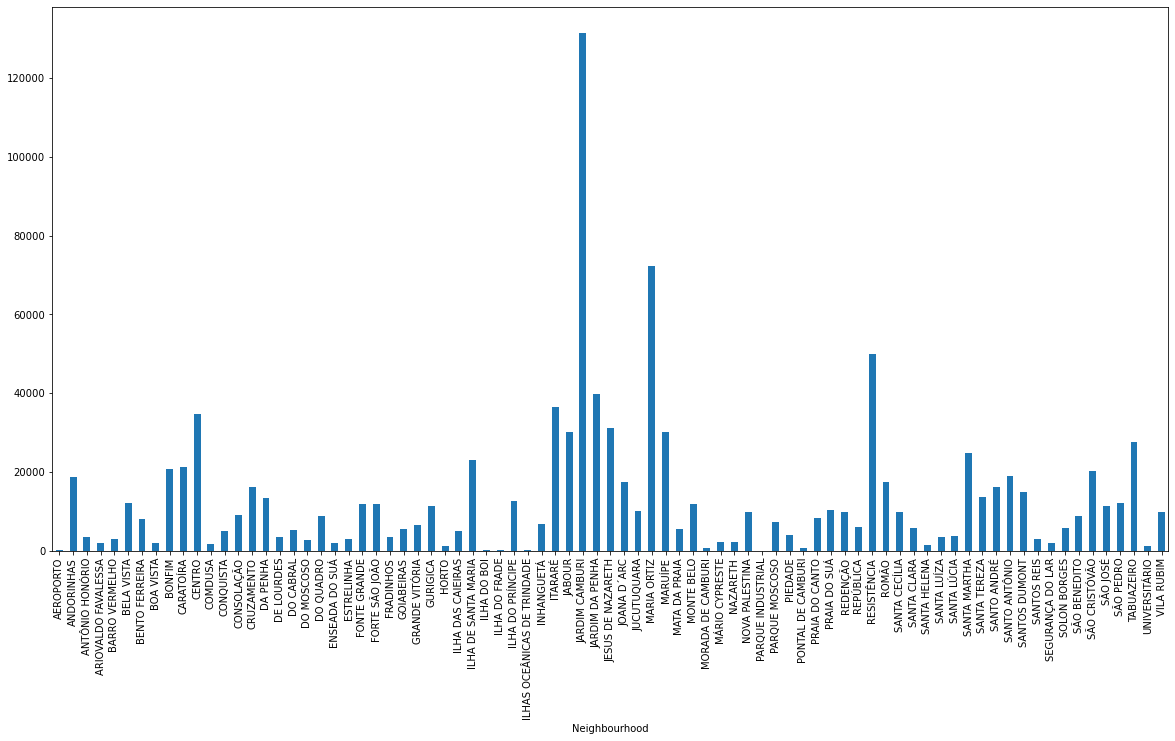

In [29]:
df2.groupby(['Neighbourhood'])['Wait_Days'].sum().plot(kind='bar',figsize=(20,10),fontsize=10)

#### but as we see we have 2 only in ILHAS OCEÂNICAS DE TRINDADE so we can't take it series problem so we will check a average wait days in the most Neighbourhood freq "JARDIM CAMBURI"

In [30]:
df2[df2['Neighbourhood'] == 'JARDIM CAMBURI']['Wait_Days'].mean() ### average waiting days in the most freq Neighbourhood

20.16393191228339

#### As we see in "JARDIM CAMBURI"  you have to wait 20 day in average which is to long 

## Research Question 5 (What is The effect of Hypertension in no-show?)

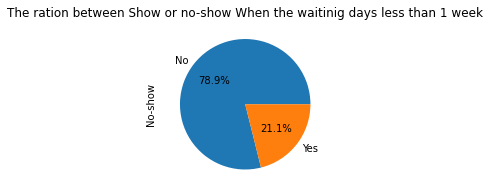

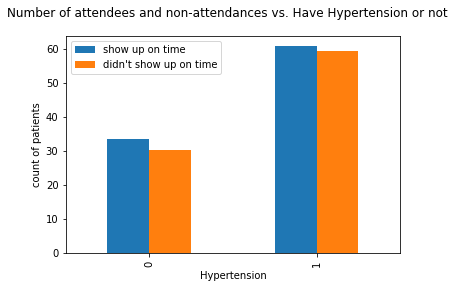

In [31]:
count_Hypertension = df2.groupby(['Hypertension'])['No-show'].count()
my_pie(count_Hypertension,['No', 'Yes'], title, (3,3)) #### My pie function
plt.show()

count_Hypertension = df2.groupby(['Hypertension', 'No-show']).mean()

count_Hypertension["Age"].unstack().plot(kind='bar', tick_label = ['s','d'])
plt.legend(["show up on time","didn't show up on time"]) #Clarify the features of the drawing
plt.suptitle('Number of attendees and non-attendances vs. Have Hypertension or not') #a title to paint it
plt.ylabel('count of patients') #Add an address to the y axis
plt.show()

### From the first plot above we see patients without Hypertension have 79% and with Hypertension 21%
### The second plot tells us that the ratio between the patients with Hypertension or not dont really effect the No-show

## Research Question 6 (What is The effect of Diabetes in no-show?)

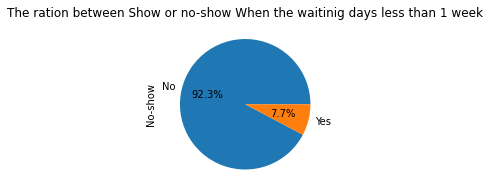

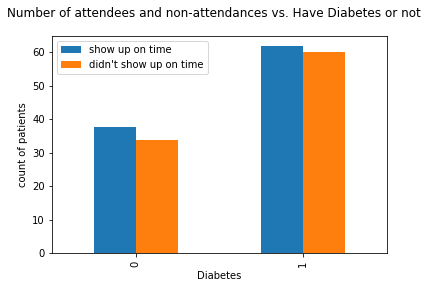

In [32]:
count_diabets = df2.groupby(['Diabetes'])['No-show'].count()
title = 'The ration between the pations with Diabetes and not'

my_pie(count_diabets,['No', 'Yes'], title, (3,3))
plt.show()

count_diabets = df2.groupby(['Diabetes', 'No-show']).mean()

count_diabets["Age"].unstack().plot(kind='bar', tick_label = ['s','d'])
plt.legend(["show up on time","didn't show up on time"]) #Clarify the features of the drawing
plt.suptitle('Number of attendees and non-attendances vs. Have Diabetes or not') #a title to paint it #a title to paint it
plt.ylabel('count of patients') #Add an address to the y axis
plt.show()

### From the first plot above we see patients without Diabetes have 92% and with Hypertension 8% which is a good indicator about there is not alot of Diabetes patients in Brazil
### The second plot tells us that the ratio between the patients with Hypertension or not dont really effect the No-show

## Research Question 7 (What is The effect of Alcoholism in no-show?)

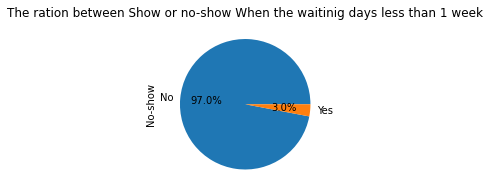

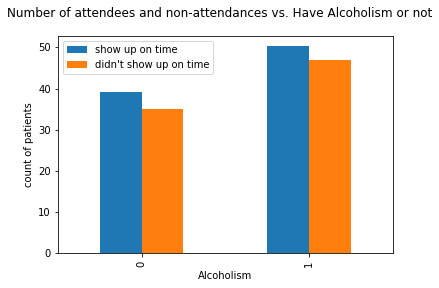

In [33]:
count_Alcoholism = df2.groupby(['Alcoholism'])['No-show'].count()
title='The ration between the pations with Alcoholism and not'
my_pie(count_Alcoholism,['No', 'Yes'], title, (3,3))
plt.show()

count_Alcoholism = df2.groupby(['Alcoholism', 'No-show']).mean()

count_Alcoholism["Age"].unstack().plot(kind='bar', tick_label = ['s','d'])
plt.legend(["show up on time","didn't show up on time"]) #Clarify the features of the drawing
plt.suptitle('Number of attendees and non-attendances vs. Have Alcoholism or not') #a title to paint it
plt.ylabel('count of patients') #Add an address to the y axis
plt.show()

### From the first plot above we see patients without Alcoholism have 97% and with Hypertension 3% which is a good indicator about there is not alot of Alcoholism patients in Brazil
### The second plot tells us that the ratio between the patients with Alcoholism or not dont really effect the No-show

## Research Question 8 (What is The effect of Handicap in no-show?)

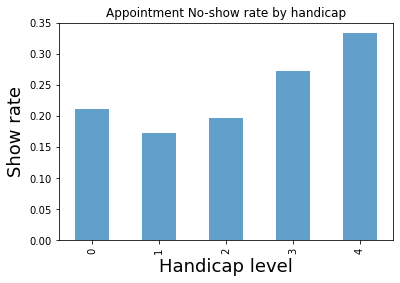

In [34]:

count_Handicap = df2.groupby(['Handicap'])['No-show'].mean()

count_Handicap.plot(kind='bar', alpha=.7);
plt.title('Appointment No-show rate by handicap');
plt.ylabel('Show rate', fontsize=18)
plt.xlabel('Handicap level', fontsize=18);

## Research Question 9 (Is SMS Has A Remarkable Contribution In Attendance?)

<AxesSubplot:xlabel='SMS_received,No-show'>

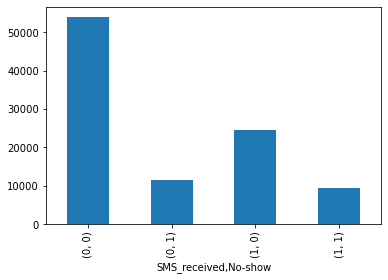

In [35]:
df2.groupby(['SMS_received','No-show'])['Age'].count().plot(kind='bar')

In [36]:
df2.query('Wait_Days== 0 & SMS_received ==1')['SMS_received'].count()

0

##### Since Recieving Sms AS A Reminder If An Appointment Is In The Same Day Of Scheduleing Won't Be Effective (Besides Maybe Reservation Occurs Immediate)
##### Analysis Will Be Exclude Any Appointment Happened In The Same Day Of Scheduleing (in Order Not TO Effect The Investigation And Analysis)
#### Investigating Data Without Appointment Happened In The Same Schedueling Day

<AxesSubplot:xlabel='SMS_received,No-show'>

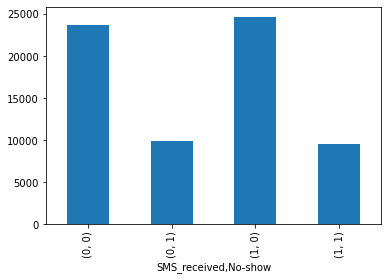

In [37]:
df2.query('Wait_Days>0').groupby(['SMS_received','No-show'])['Age'].count().plot(kind='bar')

In [38]:
df2.query('Wait_Days>0').groupby(['SMS_received','No-show'])['Age'].describe()

count       mean        std  min   25%   50%   75%  \
SMS_received No-show                                                         
0            0        23742.0  42.543804  22.726526  1.0  24.0  44.0  60.0   
             1         9885.0  36.938189  22.047829  1.0  18.0  36.0  54.0   
1            0        24636.0  39.984494  21.987762  1.0  22.0  41.0  57.0   
             1         9497.0  34.741603  20.677402  1.0  19.0  33.0  50.0   

                        max  
SMS_received No-show         
0            0        102.0  
             1        115.0  
1            0        115.0  
             1         95.0

##### From The First Sight To The Graph Sms Has A small Effect On Attendence When the pationts receves SMS the average no-show decreasse by 6%

In [39]:
df2.head(2)

,Gender,Scheduled_Day,Appointment_Day,Wait_Days,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,0,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29,2016-04-29,0,56,JARDIM DA PENHA,0,0,0,0,0,0,0


<a id='conclusions'></a>
## Conclusions
>1- The number of Show = 88208, And the number of No-show = 22319<br>
    The plot show us that every 5 appointment there is 1 no-show so that is not okay

>2- when the waiting days is 1 week or less we have no-show (13.5%) but when the waiting days more than 1 wekk the no-show is 32%<br>
So it is clear that the greater the number of waiting days, the greater the number of No-Show

>3- Older patients are more committed to their appointments scheduled than younger ones.<br>
And youths have most no-show average, Perhaps because the seniors and infints have someone to take care of them, and perhaps the largest percentage of young people is because they are more neglected

>4- We note that the attendance rate between the Males and Females is very similar, Gender really has no effect on showing or not since the percentage of not showing among them are almost the same

>5- Neighbourhood "JARDIM CAMBURI" is has the most Reservation time<br>
    And "ILHAS OCEÂNICAS DE TRINDADE" has the biggest waiting time you have to wait 28 in average<br>
    we have 2 records only in ILHAS OCEÂNICAS DE TRINDADE so we can't take it series problem so we will check a average wait days in the most Neighbourhood freq "JARDIM CAMBURI"<br>
    in "JARDIM CAMBURI" you have to wait 20 day in average which is to long which is so long if you decrese it we will have a better servese and decrese No-show average<br>
    
>6- patients without Hypertension are 79% and with Hypertension 21%
    the ratio between the patients with Hypertension or not dont really effect the No-show
    
>7- patients without Diabetes have 92% and with Hypertension 8% which is a good indicator about there is not alot of Diabetes patients in Brazil<br>
The second plot tells us that the ratio between the patients with Hypertension or not dont really effect the No-show

>8- From the first plot above we see patients without Alcoholism have 97% and with Hypertension 3% which is a good indicator about there is not alot of Alcoholism patients in Brazil<br>
The second plot tells us that the ratio between the patients with Alcoholism or not dont really effect the No-show

>9- Since Recieving Sms AS A Reminder If An Appointment Is In The Same Day Of Scheduleing Won't Be Effective (Besides Maybe Reservation Occurs Immediate)<br>
    Sms Has A small Effect On Attendence When the pationts receves SMS the average no-show decreasse by 6%


<a id='Limitation'></a>
## Limitation
>1- No show column values is No for attended and yes for didnt attend and it was confusing

>2- Age column has -one row with value(-1 years0 which isn't logical and 5 more rows with value (115 years ) wich is outliers

>3- Appointment_day column has date without hours, minutes, and seconds

>4- Some column had a wrong name 